In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

In [2]:
import numpy as np

In [3]:
import h5py

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# read in data
with h5py.File('eim-data.h5', 'r') as h5f:
    x = h5f['0'][:,0] # all data are on the same x-grid
    ys = np.zeros( shape=( len(h5f.keys()), len(x) ) )
    for k in h5f.keys():
        # need to do this becasuse dictionary keys are unordered list
        i = int(k)
        print(f"i={i}, k={k}")
        ys[i] = h5f[k][:,1]

i=0, k=0
i=1, k=1
i=10, k=10
i=2, k=2
i=3, k=3
i=4, k=4
i=5, k=5
i=6, k=6
i=7, k=7
i=8, k=8
i=9, k=9


In [6]:
x.shape

(11,)

In [7]:
ys.shape

(11, 11)

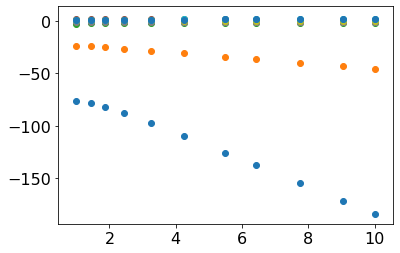

In [8]:
plt.figure()
for y in ys:
    plt.scatter(x, y)
# plt.ylim(-5,5)

# fits 

In [9]:
# based on
# https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

In [10]:
import tensorflow

In [11]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU, ReLU, ELU

In [12]:
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [13]:
x.shape

(11,)

In [14]:
ys.shape

(11, 11)

In [15]:
ys[0].reshape(-1,1).shape

(11, 1)

In [16]:
x = x.reshape(-1, 1)
y0 = ys[0].reshape(-1, 1)

In [17]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, ys[0], test_size = 0.08, random_state = 1)

In [18]:
X_train.shape

(10, 1)

In [19]:
X_test.shape

(1, 1)

In [20]:
y_train.shape

(10,)

In [21]:
y_test.shape

(1,)

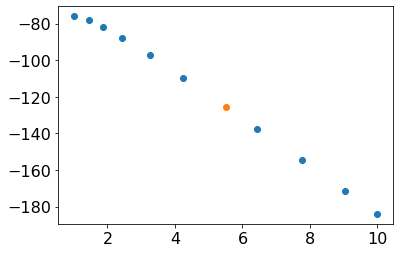

In [22]:
plt.figure()
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [23]:
y_train.shape

(10,)

In [24]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



ysc = StandardScaler()
y_train = ysc.fit_transform(y_train.reshape(-1,1))
y_test = ysc.transform(y_test.reshape(-1,1))


In [25]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(512, activation = 'relu', input_dim = 1))

# Adding the second hidden layer
model.add(Dense(units = 512, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 512, activation = 'relu'))

# model.add(Dropout(0.5))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

In [ ]:
# Fitting the ANN to the Training set
# Fitting the ANN to the Training set
history = model.fit(
    X_train,
    y_train,
    epochs = 300,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[TQDMNotebookCallback(leave_inner=False)]
);
# model.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test))

In [28]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

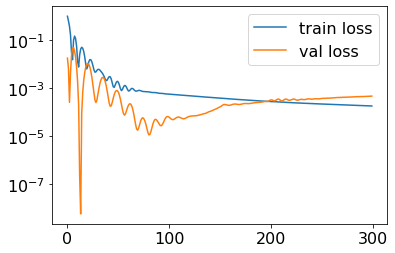

In [29]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')

plt.yscale('log')

plt.legend()
plt.show()

In [30]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.6f, Test: %.5f' % (train_acc, test_acc))

Train: 0.000176, Test: 0.00046


In [31]:
y_pred = model.predict(X_train)

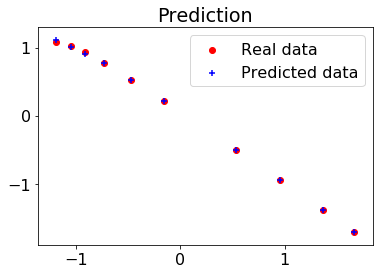

In [32]:
plt.figure()
plt.scatter(X_train, y_train, color = 'red', label = 'Real data')
plt.scatter(X_train, y_pred, color = 'blue', label = 'Predicted data', marker='+')
plt.title('Prediction')
plt.legend()
plt.show()

In [33]:
y_pred_test = model.predict(X_test)

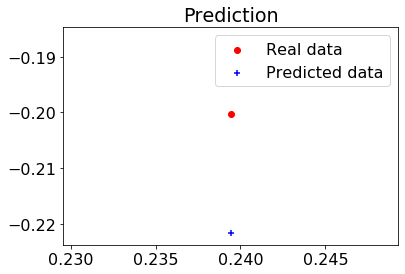

In [34]:
plt.figure()
plt.scatter(X_test, y_test, color = 'red', label = 'Real data')
plt.scatter(X_test, y_pred_test, color = 'blue', label = 'Predicted data', marker='+')
plt.title('Prediction')
plt.legend()
plt.show()

In [37]:
X_train.shape

(10, 1)

In [38]:
y_train.shape

(10, 1)

In [39]:
y_pred[:,0].shape

(10,)

In [44]:
y_train

array([[-0.9504161 ],
       [-1.70701798],
       [-1.38689977],
       [ 0.52943766],
       [ 0.77615426],
       [ 1.0756091 ],
       [ 1.02763247],
       [-0.50543459],
       [ 0.21179331],
       [ 0.92914166]])

In [45]:
y_pred[:,0]

array([-0.94992197, -1.7071111 , -1.3871188 ,  0.5304689 ,  0.775147  ,
        1.107853  ,  1.0089734 , -0.5054287 ,  0.21150328,  0.9098749 ],
      dtype=float32)

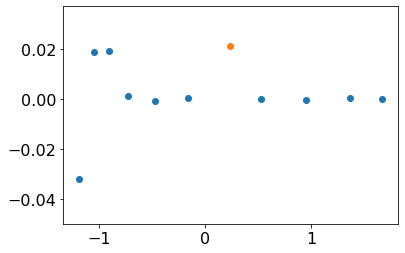

In [46]:
plt.figure()
plt.scatter(X_train, y_train[:,0]-y_pred[:,0])
plt.scatter(X_test, y_test-y_pred_test[:,0])

In [47]:
X_train.shape

(10, 1)

In [48]:
X_train.min()

-1.1911508819491987

In [49]:
X_train.max()

1.6699867341426458

In [50]:
x_cont = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)
y_pred_cont = model.predict(x_cont)

In [51]:
%%timeit
y_pred_cont = model.predict(x_cont[0].reshape(-1,1))

13 ms ± 353 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%%timeit
y_pred_cont = model.predict(x_cont)

34.6 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


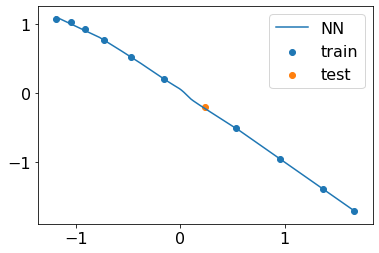

In [53]:
plt.figure()
plt.plot(x_cont, y_pred_cont, label='NN')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()

In [54]:
# compare with linear regression

In [57]:
import sys
sys.path.append('../../rom/')

In [58]:
import fitslr

In [59]:
lr = fitslr.LinearPolynomialBasisRegression()

In [60]:
lr.fit(X_train, y_train, method='direct', maxdegs=[4], max_deg_total=7)

In [61]:
lr.predict(X_train)

array([[-0.95106105],
       [-1.71152924],
       [-1.37761691],
       [ 0.53926398],
       [ 0.77795252],
       [ 1.08873579],
       [ 1.01383346],
       [-0.51565713],
       [ 0.21656125],
       [ 0.91951735]])

In [62]:
lr.predict(X_train).shape

(10, 1)

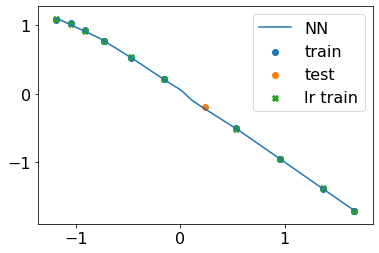

In [63]:
plt.figure()
plt.plot(x_cont, y_pred_cont, label='NN')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')

plt.scatter(X_train, lr.predict(X_train), label='lr train', marker='X')

plt.legend()

In [64]:
%%timeit
lr.predict(X_train)

47 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


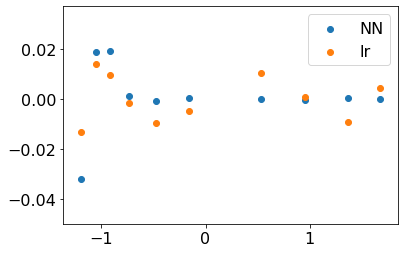

In [66]:
plt.figure()
plt.scatter(X_train, y_train[:,0]-y_pred[:,0], label='NN')
plt.scatter(X_train, y_train-lr.predict(X_train), label='lr')
plt.legend()

# try multiple output y

In [67]:
X_train.shape

(10, 1)

In [68]:
y_train.shape

(10, 1)

In [69]:
sc = StandardScaler()
xprime = sc.fit_transform(x)

In [70]:
# X_train_2d = np.column_stack((xprime, xprime))
X_train_2d = xprime.reshape(-1,1)

In [71]:
X_train_2d.shape

(11, 1)

In [72]:
X_train_2d

array([[-1.26881559],
       [-0.52056601],
       [ 0.22768358],
       [ 0.97593316],
       [ 1.72418274],
       [-0.9762227 ],
       [-0.79084925],
       [-1.1226731 ],
       [-0.19003904],
       [ 1.40806862],
       [ 0.53329758]])

In [73]:
ys[0].shape

(11,)

In [74]:
len(ys)

11

In [75]:
# individual scalers
y_scalers = []
y_scaled = []
for i in range(len(ys)):
    y_scalers.append(StandardScaler())
    y_scaled.append(y_scalers[i].fit_transform(ys[i].reshape(-1,1)))

In [76]:
print(ys[0])
print(y_scalers[0].inverse_transform(y_scaled[0]).reshape(1,-1))

[ -76.0356166   -97.22045024 -125.52406224 -154.62084366 -183.96782821
  -81.71677838  -87.65083581  -77.89652833 -109.5412017  -171.55112079
 -137.36095324]
[[ -76.0356166   -97.22045024 -125.52406224 -154.62084366 -183.96782821
   -81.71677838  -87.65083581  -77.89652833 -109.5412017  -171.55112079
  -137.36095324]]


In [77]:
print(ys[1])
print(y_scalers[1].inverse_transform(y_scaled[1]).reshape(1,-1))

[-23.92479191 -28.4549373  -34.17260261 -39.95589276 -45.75813295
 -25.18800468 -26.46107513 -24.34461478 -30.96424674 -43.30540988
 -36.53117111]
[[-23.92479191 -28.4549373  -34.17260261 -39.95589276 -45.75813295
  -25.18800468 -26.46107513 -24.34461478 -30.96424674 -43.30540988
  -36.53117111]]


In [78]:
y_train_2d = np.column_stack((y_scaled[0], y_scaled[1]))

In [79]:
y_train_2d.shape

(11, 2)

In [80]:
y_train_2d

array([[ 1.14511719,  1.16520223],
       [ 0.57332917,  0.55966464],
       [-0.19059783, -0.20460692],
       [-0.97593282, -0.97765045],
       [-1.7680209 , -1.753227  ],
       [ 0.99178012,  0.99635052],
       [ 0.83161729,  0.82618114],
       [ 1.09489036,  1.10908515],
       [ 0.24078664,  0.2242491 ],
       [-1.43288848, -1.42537527],
       [-0.51008075, -0.51987315]])

In [81]:
X_train = X_train_2d[:-1]
X_test = X_train_2d[-1]

In [82]:
X_train.shape

(10, 1)

In [83]:
X_test.shape

(1,)

In [84]:
y_train = y_train_2d[:-1]
y_test = y_train_2d[-1].reshape(1,-1)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 1)
(1,)
(10, 2)
(1, 2)


In [86]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(512, activation = 'relu', input_dim = 1))

# Adding the second hidden layer
model.add(Dense(units = 512, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 512, activation = 'relu'))

# model.add(Dropout(0.5))

# Adding the output layer

model.add(Dense(units = 2))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

In [103]:
# Fitting the ANN to the Training set
history = model.fit(
    X_train,
    y_train,
    epochs = 2000,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[TQDMNotebookCallback(leave_inner=False)]
);


In [104]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

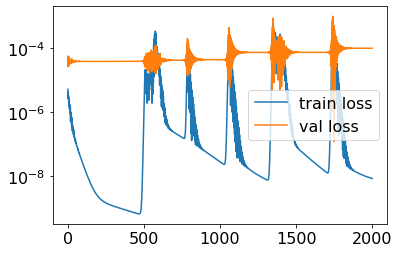

In [105]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')

plt.yscale('log')

plt.legend()
plt.show()

In [106]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.10f, Test: %.10f' % (train_acc, test_acc))

Train: 0.0000000086, Test: 0.0001001685


In [107]:
model.predict(X_train)

array([[ 1.145122  ,  1.1651886 ],
       [ 0.5733288 ,  0.5596628 ],
       [-0.1905992 , -0.20460902],
       [-0.97581667, -0.9776561 ],
       [-1.7678571 , -1.7532433 ],
       [ 0.9917264 ,  0.99620575],
       [ 0.8316073 ,  0.82618284],
       [ 1.0949346 ,  1.1092067 ],
       [ 0.24078687,  0.22424905],
       [-1.4331892 , -1.4253702 ]], dtype=float32)

In [108]:
y_train

array([[ 1.14511719,  1.16520223],
       [ 0.57332917,  0.55966464],
       [-0.19059783, -0.20460692],
       [-0.97593282, -0.97765045],
       [-1.7680209 , -1.753227  ],
       [ 0.99178012,  0.99635052],
       [ 0.83161729,  0.82618114],
       [ 1.09489036,  1.10908515],
       [ 0.24078664,  0.2242491 ],
       [-1.43288848, -1.42537527]])

In [109]:
X_train

array([[-1.26881559],
       [-0.52056601],
       [ 0.22768358],
       [ 0.97593316],
       [ 1.72418274],
       [-0.9762227 ],
       [-0.79084925],
       [-1.1226731 ],
       [-0.19003904],
       [ 1.40806862]])

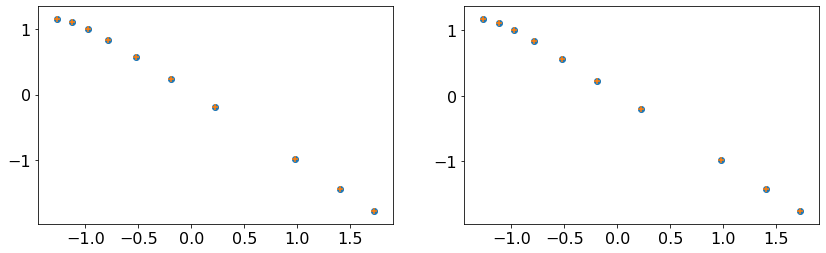

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))

axes[0].scatter(X_train, y_train.T[0])
axes[0].scatter(X_train, model.predict(X_train).T[0], marker='+')

axes[1].scatter(X_train, y_train.T[1])
axes[1].scatter(X_train, model.predict(X_train).T[1], marker='+')

In [111]:
y_scalers[0].inverse_transform(y_train.T[0])

array([ -76.0356166 ,  -97.22045024, -125.52406224, -154.62084366,
       -183.96782821,  -81.71677838,  -87.65083581,  -77.89652833,
       -109.5412017 , -171.55112079])

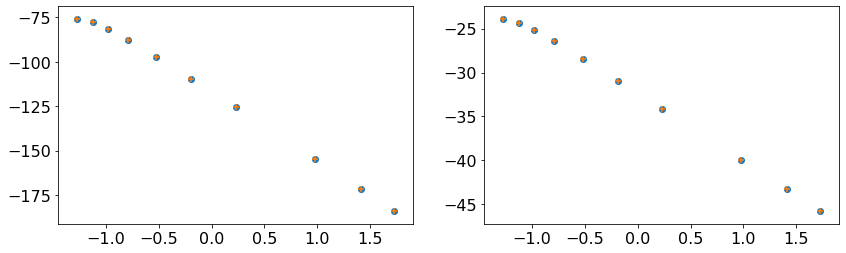

In [112]:
# undo transformations

fig, axes = plt.subplots(1, 2, figsize=(14,4))

scfunc = y_scalers[0].inverse_transform

axes[0].scatter(X_train, scfunc(y_train.T[0]))
axes[0].scatter(X_train, scfunc(model.predict(X_train).T[0]), marker='+')

scfunc = y_scalers[1].inverse_transform

axes[1].scatter(X_train, scfunc(y_train.T[1]))
axes[1].scatter(X_train, scfunc(model.predict(X_train).T[1]), marker='+')

In [113]:
x_cont = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)

In [114]:
yhat0, yhat1 = model.predict(x_cont).T

In [115]:
x_cont.shape

(100, 1)

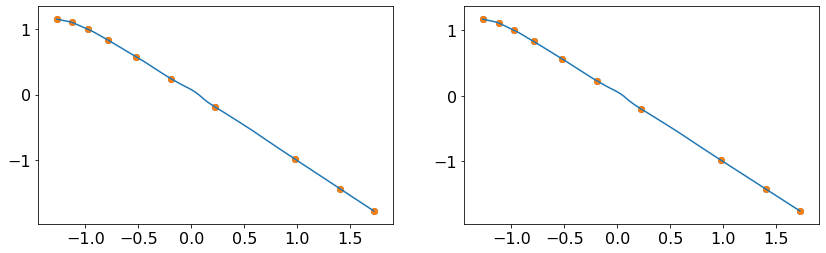

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))


axes[0].scatter(X_train, y_train.T[0])
axes[0].scatter(X_train, model.predict(X_train).T[0])
axes[0].plot(x_cont, yhat0)


axes[1].scatter(X_train, y_train.T[1])
axes[1].scatter(X_train, model.predict(X_train).T[1])
axes[1].plot(x_cont, yhat1)

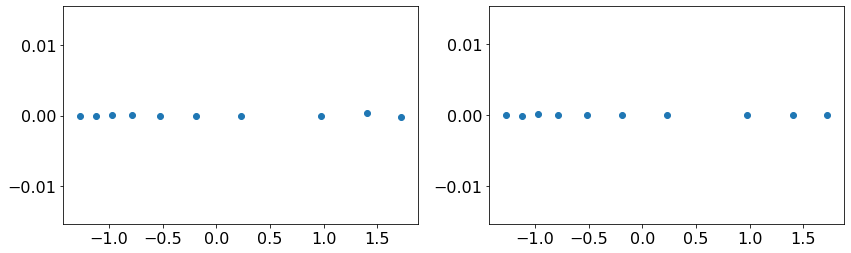

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))

axes[0].scatter(X_train, y_train.T[0]-model.predict(X_train).T[0])

axes[1].scatter(X_train, y_train.T[1]-model.predict(X_train).T[1])


# try fitting all of them (11 output)

In [118]:
sc = StandardScaler()
xprime = sc.fit_transform(x)

In [119]:
# X_train_2d = np.column_stack((xprime, xprime))
X_train_11d = xprime.reshape(-1,1)

In [120]:
X_train_11d.shape

(11, 1)

In [121]:
X_train_11d

array([[-1.26881559],
       [-0.52056601],
       [ 0.22768358],
       [ 0.97593316],
       [ 1.72418274],
       [-0.9762227 ],
       [-0.79084925],
       [-1.1226731 ],
       [-0.19003904],
       [ 1.40806862],
       [ 0.53329758]])

In [122]:
y_train_11d = ys.T

In [123]:
# individual scalers
y_scalers = []
y_scaled = []
for i in range(len(ys)):
    y_scalers.append(StandardScaler())
    y_scaled.append(y_scalers[i].fit_transform(ys[i].reshape(-1,1)))

In [124]:
print(ys[0])
print(y_scalers[0].inverse_transform(y_scaled[0]).reshape(1,-1))

[ -76.0356166   -97.22045024 -125.52406224 -154.62084366 -183.96782821
  -81.71677838  -87.65083581  -77.89652833 -109.5412017  -171.55112079
 -137.36095324]
[[ -76.0356166   -97.22045024 -125.52406224 -154.62084366 -183.96782821
   -81.71677838  -87.65083581  -77.89652833 -109.5412017  -171.55112079
  -137.36095324]]


In [125]:
print(ys[1])
print(y_scalers[1].inverse_transform(y_scaled[1]).reshape(1,-1))

[-23.92479191 -28.4549373  -34.17260261 -39.95589276 -45.75813295
 -25.18800468 -26.46107513 -24.34461478 -30.96424674 -43.30540988
 -36.53117111]
[[-23.92479191 -28.4549373  -34.17260261 -39.95589276 -45.75813295
  -25.18800468 -26.46107513 -24.34461478 -30.96424674 -43.30540988
  -36.53117111]]


In [126]:
y_train_11d = np.column_stack([yy for yy in y_scaled])

In [127]:
X_train_11d.shape

(11, 1)

In [128]:
len(X_train_11d)

11

In [129]:
list(range(len(X_train_11d)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [130]:
np.random.randint(0, 11, size=3)

array([4, 2, 1])

In [131]:
def train_test_split_indicies(N, p):
    """
    N: total number of samples
    p: percentage for testing
    """
    
    Ns = np.arange(N)
    np.random.shuffle(Ns)
    
    pint = int(N*p)
    
    test_idxs = Ns[:pint]
    train_idxs = Ns[pint:]
    
    return train_idxs, test_idxs

In [132]:
train_idxs, test_idxs = train_test_split_indicies(len(X_train_11d), 0.1)

In [133]:
train_idxs

array([ 2,  4,  9,  8, 10,  5,  0,  7,  6,  3])

In [134]:
test_idxs

array([1])

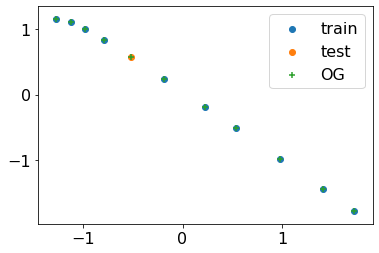

In [135]:
xttrain = X_train_11d[train_idxs]
yttrain = y_train_11d.T[0][train_idxs]

xttest = X_train_11d[test_idxs]
yttest = y_train_11d.T[0][test_idxs]

plt.figure()
plt.scatter(xttrain, yttrain, label='train')
plt.scatter(xttest, yttest, label='test')
plt.scatter(X_train_11d, y_train_11d.T[0], label='OG', marker='+')
plt.legend()

In [136]:
X_train_11d

array([[-1.26881559],
       [-0.52056601],
       [ 0.22768358],
       [ 0.97593316],
       [ 1.72418274],
       [-0.9762227 ],
       [-0.79084925],
       [-1.1226731 ],
       [-0.19003904],
       [ 1.40806862],
       [ 0.53329758]])

In [138]:
X_train = X_train_11d[train_idxs]
X_test = X_train_11d[test_idxs]

In [139]:
X_train.shape

(10, 1)

In [140]:
X_test.shape

(1, 1)

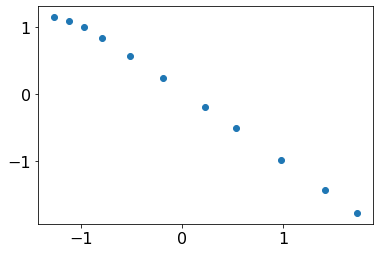

In [141]:
plt.figure()
plt.scatter(X_train_11d, y_train_11d[:,0])

In [142]:
y_train_11d[0]

array([ 1.14511719,  1.16520223, -1.52940396,  1.14224306,  1.47595301,
        0.73816699,  1.93864785,  1.55976311,  1.30168864, -1.28051552,
       -1.27140149])

In [143]:
y_train = y_train_11d[train_idxs]
y_test = y_train_11d[test_idxs]

In [144]:
# y_train = y_train_11d[:-1]
# y_test = y_train_11d[-1].reshape(1,-1)

In [145]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 1)
(1, 1)
(10, 11)
(1, 11)


In [146]:
y_train[:,0]

array([-0.19059783, -1.7680209 , -1.43288848,  0.24078664, -0.51008075,
        0.99178012,  1.14511719,  1.09489036,  0.83161729, -0.97593282])

In [147]:
X_train[:,0].shape

(10,)

In [148]:
y_train[:,0]

array([-0.19059783, -1.7680209 , -1.43288848,  0.24078664, -0.51008075,
        0.99178012,  1.14511719,  1.09489036,  0.83161729, -0.97593282])

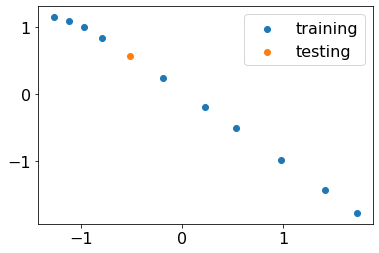

In [149]:
plt.figure()
plt.scatter(X_train, y_train[:,0], label='training')
plt.scatter(X_test, y_test[:,0], label='testing')
plt.legend()

In [166]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(256, activation = 'relu', input_dim = 1))

# Adding the second hidden layer
model.add(Dense(units = 256, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 256, activation = 'relu'))

# model.add(Dropout(0.5))

# Adding the output layer

model.add(Dense(units = 11))



STEPS_PER_EPOCH=11 #?
lr_schedule = tensorflow.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

# see https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
def get_optimizer():
    return tensorflow.keras.optimizers.Adam(lr_schedule)


optimizer = 'adam'
# optimizer = get_optimizer()


#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics=['mse'])


callbacks = [TQDMNotebookCallback(leave_inner=False),
             ModelCheckpoint('best.h5', save_best_only=True, monitor='loss')]


In [170]:

# Fitting the ANN to the Training set
history = model.fit(
    X_train,
    y_train,
    epochs = 500,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=callbacks
);


In [171]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

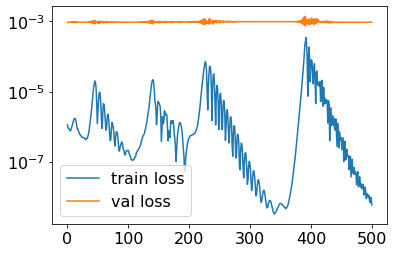

In [172]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')

plt.yscale('log')

plt.legend()
plt.show()

In [173]:
# validation set is very important!!!
# to prevent overfitting!!!!!

In [174]:
model_pred = load_model('best.h5')
# model_pred = model

In [175]:
# %%timeit
# model_pred.predict(X_train_11d[0])

In [176]:
model_pred.predict(X_train_11d[0])

array([[ 1.1450992 ,  1.1652513 , -1.5294524 ,  1.1421415 ,  1.4758515 ,
         0.73828775,  1.938808  ,  1.5596884 ,  1.3015758 , -1.2804623 ,
        -1.2713603 ]], dtype=float32)

In [177]:
y_train_11d[0]

array([ 1.14511719,  1.16520223, -1.52940396,  1.14224306,  1.47595301,
        0.73816699,  1.93864785,  1.55976311,  1.30168864, -1.28051552,
       -1.27140149])

In [178]:
yhat_11d = model_pred.predict(X_train_11d).T

In [179]:
yhat_11d.shape

(11, 11)

In [180]:
from sklearn.metrics import mean_squared_error

In [181]:
res=[]
for i in range(11):
    res.append(mean_squared_error(y_train_11d.T[i], yhat_11d[i]))
res=np.array(res)

In [182]:
res.sum()

0.0009836364671718238

In [183]:
# see how it ask continuously
x_cont = np.linspace(X_train_11d.min(), X_train_11d.max(), 100).reshape(-1,1)
yhat_11d_cont = model_pred.predict(x_cont).T

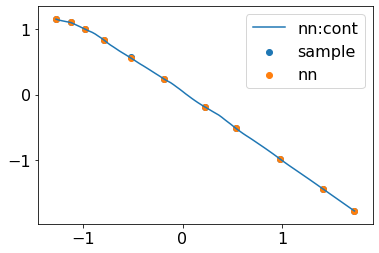

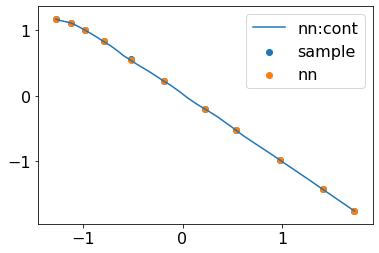

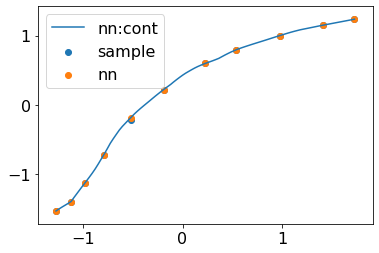

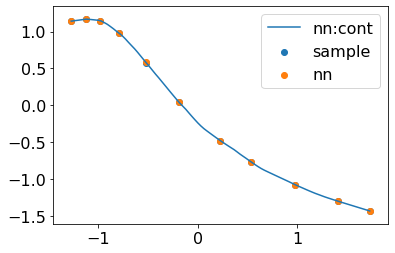

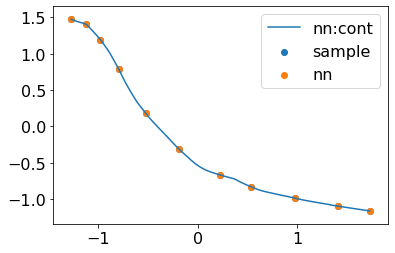

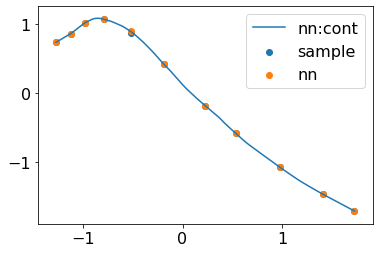

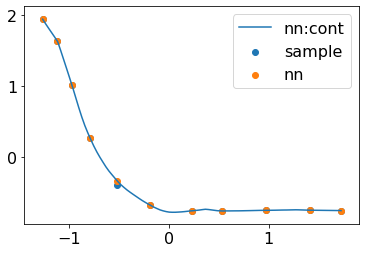

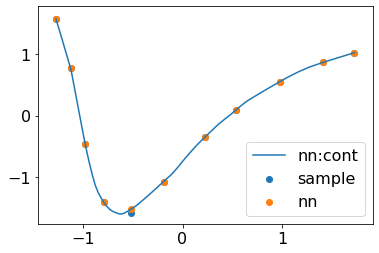

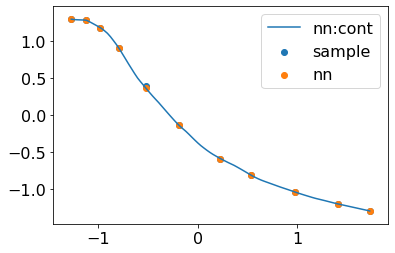

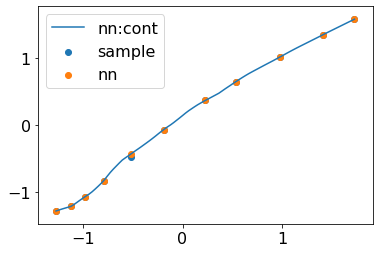

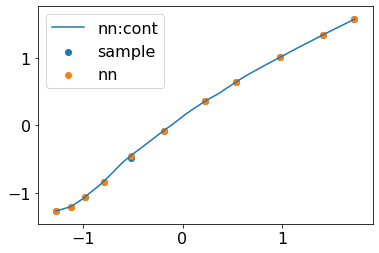

In [184]:
for i in range(11):
    plt.figure()
    plt.scatter(X_train_11d.T[0], y_train_11d.T[i], label='sample')
    plt.scatter(X_train_11d.T[0], yhat_11d[i], label='nn')
    plt.plot(x_cont, yhat_11d_cont[i], label='nn:cont')
    plt.legend()
    plt.show()
    plt.close()